<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Sentiment_analysis_IMDB_movie_review_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import svm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import load_iris, load_wine, fetch_20newsgroups, fetch_openml
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    LogisticRegressionCV,
    Lasso,
    Ridge,
    ElasticNet
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    cross_validate
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    OrdinalEncoder,
    LabelEncoder,
    OneHotEncoder,
    PolynomialFeatures
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.multiclass import OneVsRestClassifier

In [2]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## **Loading IMDB data set**

### About Dataset
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

examples of data analysis:

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [3]:
from datasets import load_dataset

dataset_train = load_dataset('imdb',split='train')
dataset_train.rename_column('label', 'labels')
train_df=pd.DataFrame(dataset_train)

dataset_test = load_dataset('imdb',split='test')
dataset_test.rename_column('label', 'labels')
test_df=pd.DataFrame(dataset_test)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [4]:
dataset_train
train_df

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


In [5]:
#https://mpolinowski.github.io/docs/Development/Python/2023-05-20-python-sklearn-cheat-sheet/2023-05-20/
train_df.info()
train_df['text'].str.isspace().sum()
# is the dataset balanced
train_df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


,count
label,
0,12500
1,12500


#CountVectorizer is used to create Bag of Words (BOW)

Text(0.5, 1.0, 'Top30 Words used in Negative Reviews')

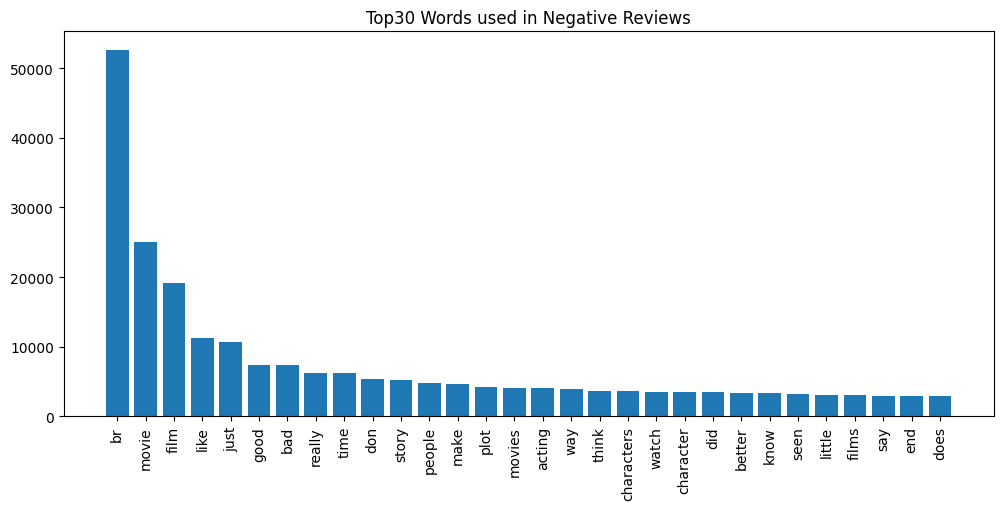

In [6]:
# find top 20 words in negative reviews
train_neg_df = train_df[train_df['label'] == 0]

count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_df=0.8 ,min_df=100)
bag_of_words = count_vectorizer.fit_transform(train_neg_df['text'])
sum_words = bag_of_words.sum(axis=0)

words_freq = [
    (word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()
]

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

x, y = zip(*words_freq[:30])

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Top30 Words used in Negative Reviews')
#!mkdir assets
#plt.savefig('assets/Negative_word.webp', bbox_inches='tight')

Text(0.5, 1.0, 'Top30 Words used in Positive Reviews')

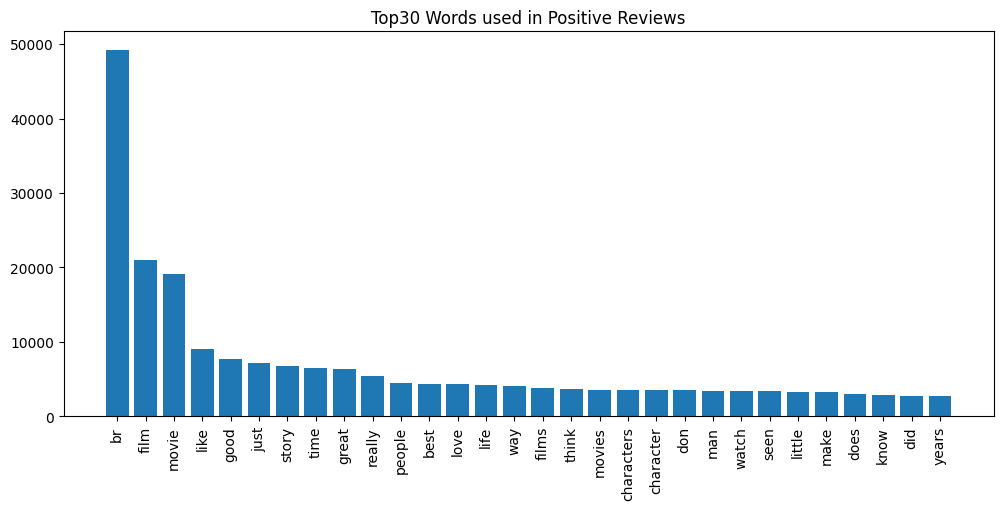

In [7]:
# find top 20 words in positive reviews
train_pos_df = train_df[train_df['label'] == 1]

count_vectorizer = CountVectorizer(analyzer='word', stop_words='english')
bag_of_words = count_vectorizer.fit_transform(train_pos_df['text'])
sum_words = bag_of_words.sum(axis=0)

words_freq = [
    (word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()
]

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

x, y = zip(*words_freq[:30])

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Top30 Words used in Positive Reviews')

#plt.savefig('assets/Positive_words.webp', bbox_inches='tight')

In [8]:
X_rev_train = train_df['text']
y_rev_train = train_df['label']

X_rev_test = test_df['text']
y_rev_test = test_df['label']

In [9]:
#vect = CountVectorizer().fit(X_rev_train)
vect = CountVectorizer(binary=False, max_df=0.80, min_df=10, max_features=10000, stop_words="english").fit(X_rev_train)

X_train = vect.transform(X_rev_train)
X_test = vect.transform(X_rev_test)
print("X_train:\n{}".format(repr(X_train)))


X_train:
<25000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1975229 stored elements in Compressed Sparse Row format>


In [10]:
X_train[0]

<1x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 101 stored elements in Compressed Sparse Row format>

In [11]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 5010 to 5030:\n{}".format(feature_names[5010:5030]))
print("Every 2000th feature:\n{}".format(feature_names[::1000]))


Number of features: 10000
First 20 features:
['00' '000' '10' '100' '1000' '101' '11' '12' '13' '13th' '14' '15' '150'
 '16' '17' '18' '18th' '19' '1920' '1920s']
Features 5010 to 5030:
['kick' 'kicked' 'kicking' 'kicks' 'kid' 'kiddie' 'kidding' 'kidman'
 'kidnap' 'kidnapped' 'kidnapping' 'kidnaps' 'kids' 'kill' 'killed'
 'killer' 'killers' 'killing' 'killings' 'kills']
Every 2000th feature:
['00' 'bimbo' 'considerably' 'elephants' 'grayson' 'kentucky' 'mystical'
 'proudly' 'shall' 'thankful']


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

scores = cross_val_score(LogisticRegression(), X_train, y_rev_train, cv=3)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.82


In [87]:
nb_vec = LogisticRegression()
nb_vec.fit(X_train, y_rev_train)
preds = nb_vec.predict(X_test)
print(classification_report(y_rev_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [14]:
tfidf_rev_vec = TfidfVectorizer(
    lowercase=True,
    analyzer='word',
    stop_words='english',
    min_df=5,
    ngram_range=(1, 3)
)

X_rev_tfidf_train = tfidf_rev_vec.fit_transform(X_rev_train)
X_rev_tfidf_test = tfidf_rev_vec.transform(X_rev_test)

In [15]:


nb_rev = LogisticRegression()
nb_rev.fit(X_rev_tfidf_train, y_rev_train)

LogisticRegression()

In [16]:
preds = nb_rev.predict(X_rev_tfidf_test)
print(classification_report(y_rev_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



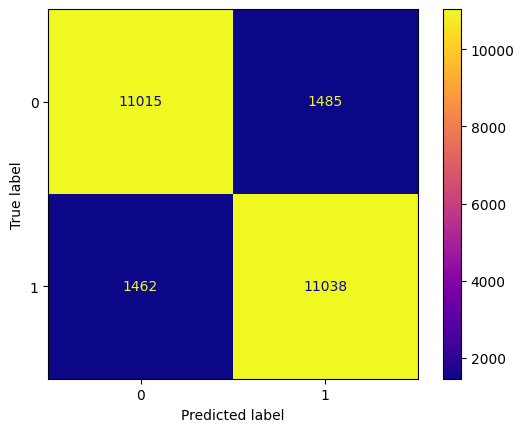

In [17]:
conf_mtx = confusion_matrix(y_rev_test, preds)
conf_mtx_plot = ConfusionMatrixDisplay(
     confusion_matrix=conf_mtx
)
conf_mtx_plot.plot(cmap='plasma')

In [18]:
from sklearn.naive_bayes import BernoulliNB


text_clf = Pipeline([('vect', CountVectorizer(stop_words='english',max_features=10000,ngram_range=(1,2))), ('tfidf', TfidfTransformer()), ('clf', LogisticRegression(solver='lbfgs')),])

In [19]:
text_clf.fit(X_rev_train, y_rev_train)
text_clf.score(X_rev_test,y_rev_test)

0.88156

In [20]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

nltk.download('wordnet')
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier
nltk.download('stopwords')
stop_words = stopwords.words('english')

pipelineSGD = Pipeline([
    ('vectorizer', CountVectorizer(stop_words = stop_words, ngram_range = (1,2), max_features = None)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, max_iter=60))
])

pipelineSGD.fit(X_rev_train, y_rev_train)

y_predSGD = pipelineSGD.predict(X_rev_test)
print("Predicted: ", y_predSGD)

print("Accuracy: ", metrics.accuracy_score(y_rev_test, y_predSGD)*100, "%")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Predicted:  [0 0 0 ... 1 0 1]
Accuracy:  88.66000000000001 %


In [21]:
from sklearn.svm import LinearSVC

pipelineSVM = Pipeline([
    ('vectorizer', CountVectorizer(stop_words = stop_words, ngram_range = (1,2), max_features = None)),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(C = 0.5, max_iter = 1000, penalty = 'l2', tol = 0.01))
])


pipelineSVM.fit(X_rev_train, y_rev_train)

y_predSVM = pipelineSVM.predict(X_rev_test)
print("Predicted: ", y_predSVM)

print("Accuracy: ", metrics.accuracy_score(y_rev_test, y_predSVM)*100, "%")

Predicted:  [0 0 0 ... 1 0 1]
Accuracy:  89.216 %


In [56]:
text_clf = Pipeline([('vect', CountVectorizer(analyzer='word', token_pattern=r'\w{2,}',  strip_accents='unicode', stop_words=stop_words, max_features=10000,ngram_range=(1,1))),
                     ('tfidf', TfidfTransformer()), ('clf', LogisticRegression()),])
text_clf.fit(X_rev_train, y_rev_train)
text_clf.score(X_rev_test,y_rev_test)

0.883

In [57]:
# Most common words that were used in positive reviews
#https://github.com/Kasra1377/IMDB-sentiment-analysis/blob/master/data-preprocessing.ipynb
features = text_clf['vect'].get_feature_names_out()
sorted(zip(text_clf['clf'].coef_[0] , features) , reverse = True)[:20]


[(6.702523394388523, 'great'),
 (5.98844561152383, 'excellent'),
 (4.9466318577776995, 'best'),
 (4.765188514430906, 'perfect'),
 (4.625436539344808, 'wonderful'),
 (4.097720272575501, 'amazing'),
 (4.007839906630627, 'favorite'),
 (3.8985448780902376, 'well'),
 (3.6937743786864368, 'loved'),
 (3.63276937191672, 'love'),
 (3.5433308540521864, 'today'),
 (3.531193417323682, 'highly'),
 (3.5291440019388975, 'fun'),
 (3.5092939171913695, 'enjoyed'),
 (3.3762808440778063, 'superb'),
 (3.3054041690363345, 'brilliant'),
 (3.1632922296186172, 'enjoyable'),
 (3.1245249742493404, 'definitely'),
 (3.0357459663505875, 'fantastic'),
 (2.9558245636259723, 'beautiful')]

In [58]:
# Most common words that were used in negative reviews
sorted(zip(text_clf['clf'].coef_[0] , features))[:20]

[(-9.041766495095406, 'worst'),
 (-7.218062984284839, 'bad'),
 (-6.517455666901647, 'waste'),
 (-6.49853806699128, 'awful'),
 (-5.660308036676881, 'boring'),
 (-5.170537106776461, 'poor'),
 (-4.77399888570321, 'nothing'),
 (-4.681526912879473, 'worse'),
 (-4.611096879846951, 'terrible'),
 (-4.391857272703645, 'poorly'),
 (-4.346655704460358, 'horrible'),
 (-4.258494022963505, 'dull'),
 (-4.12781067883213, 'unfortunately'),
 (-4.085833757275736, 'disappointment'),
 (-3.88853485345611, 'supposed'),
 (-3.8287153018431908, 'annoying'),
 (-3.775979151824141, 'disappointing'),
 (-3.735460582448211, 'ridiculous'),
 (-3.68415679678861, 'fails'),
 (-3.6015866606110563, 'mess')]

Examining the Model Performance

In [25]:

text = "DONT WATCH THIS MOVIE. its a complete trash"

In [26]:
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
CLEAN = re.compile("<.*?>")    # to remove everything between "<>"
result = re.sub(CLEAN, " ", text)
result = re.sub("[^a-zA-Z]" , " " , result)
result = result.lower()
result = result.split()   # to break sentences into words
word = [ps.stem(word) for word in result if word not in stopwords.words("english")]
result = " ".join(word)
print(result)

dont watch movi complet trash


In [59]:
print(text_clf.predict_proba([text]))

[[0.76189003 0.23810997]]


In [83]:
#https://www.kaggle.com/code/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

pipe = make_pipeline(TfidfVectorizer(
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{1,}', #accept tokens that have 1 or more characters
                                    analyzer='word',
                                    ngram_range=(1, 1),
                                    min_df=100),
                     OneVsRestClassifier(LogisticRegression()))
param_grid = {'tfidfvectorizer__max_features': [5000],
              'onevsrestclassifier__estimator__C': [2],
              'onevsrestclassifier__estimator__solver': ['lbfgs'],
             }
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc')

grid3 = grid.fit(X_rev_train, y_rev_train)



In [84]:
print(grid3.best_params_)
print(grid3.best_score_)


{'onevsrestclassifier__estimator__C': 2, 'onevsrestclassifier__estimator__solver': 'lbfgs', 'tfidfvectorizer__max_features': 5000}
0.9395091822865784


In [85]:
grid3.score(X_rev_test,y_rev_test)

0.9503265344

In [31]:
# for the comparition best results:
# https://paperswithcode.com/sota/sentiment-analysis-on-imdb

In [43]:
print(grid3.predict_proba(['ok shit its greate 10 of 10 movie']))

[[0.60680737 0.39319263]]
